In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.utils import plot_model
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10

In [14]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [15]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [16]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [17]:
# build model

model = Sequential()

model.add(Input(shape=(32, 32, 3)))

model.add(Conv2D(filters=128, kernel_size=(5, 5), strides=(1,1), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=(1,1), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3, 3)))

model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=(1,1), activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(filters=256, kernel_size=(1, 1), strides=(1,1), activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(filters=256, kernel_size=(1, 1), strides=(1,1), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())


model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │         9,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 2, 2, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 2, 2, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 2, 2, 256)      │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 2, 2, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 2, 2, 256)      │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 2, 2, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1024)           │       263,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,824,266 (6.96 MB)

 Trainable params: 1,821,962 (6.95 MB)

 Non-trainable params: 2,304 (9.00 KB)

In [18]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=40)

Epoch 1/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 11ms/step - accuracy: 0.3398 - loss: 1.8604 - val_accuracy: 0.4066 - val_loss: 1.6030
Epoch 2/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.5410 - loss: 1.3045 - val_accuracy: 0.5327 - val_loss: 1.3173
Epoch 3/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6080 - loss: 1.1363 - val_accuracy: 0.6076 - val_loss: 1.1540
Epoch 4/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6677 - loss: 0.9919 - val_accuracy: 0.6140 - val_loss: 1.1188
Epoch 5/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7129 - loss: 0.8681 - val_accuracy: 0.6455 - val_loss: 1.0185
Epoch 6/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7382 - loss: 0.7905 - val_accuracy: 0.5395 - val_loss: 1.4976
Epoch 7/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7670 - loss: 0.7088 - val_accuracy: 0.7274 - val_loss: 0.8068
Epoch 8/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7902 - loss: 

In [20]:
import pandas as pd

Text(0.5, 1.0, 'loss curve')

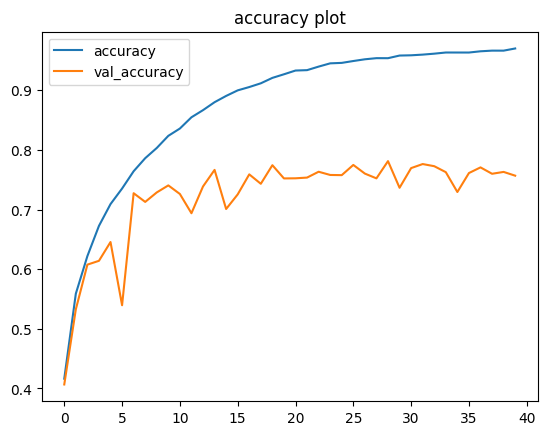

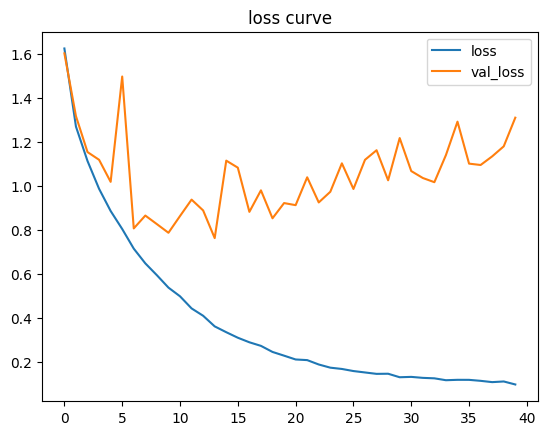

In [21]:
hist_df = pd.DataFrame(hist.history)

hist_df.plot(y=['accuracy', 'val_accuracy'])
plt.title('accuracy plot')
hist_df.plot(y=['loss', 'val_loss'])
plt.title('loss curve')

In [22]:
import cv2

In [25]:
cat = cv2.imread('../input/images/cat.jpg')
cat = cv2.cvtColor(cat, cv2.COLOR_BGR2RGB)
cat_1 = cat.copy()
cat = cv2.resize(cat, dsize=(32, 32))
cat = cat/255
cat_2 = cat.copy()
cat = cat.reshape(1, 32, 32, 3)
res = model.predict(cat, verbose=False).argmax()

error: OpenCV(4.12.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
